In [1]:
from scipy.spatial import HalfspaceIntersection
import numpy as np
halfspaces = np.array([[-1, 0., 0.],
                       [0., -1., 0.],
                       [2., 1., -4.],
                       [-0.5, 1., -2.]])
feasible_point = np.array([0.5, 0.5])
hs = HalfspaceIntersection(halfspaces, feasible_point)

In [5]:
hs.intersections

array([[0. , 0. ],
       [2. , 0. ],
       [0. , 2. ],
       [0.8, 2.4]])

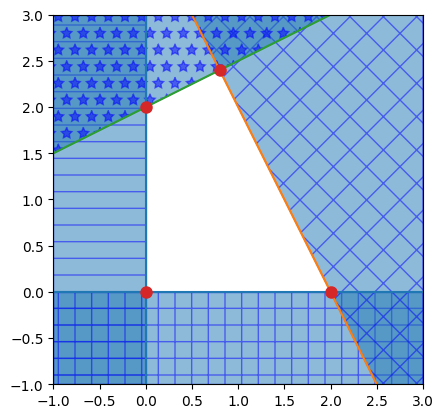

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
xlim = (-1, 3)
ylim = (-1, 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
x = np.linspace(-1, 3, 100)
symbols = ['-', '+', 'x', '*']
signs = [0, 0, -1, -1]
fmt = {"color": None, "edgecolor": "b", "alpha": 0.5}
for h, sym, sign in zip(halfspaces, symbols, signs):
    hlist = h.tolist()
    fmt["hatch"] = sym
    if h[1]== 0:
        ax.axvline(-h[2]/h[0], label='{}x+{}y+{}=0'.format(*hlist))
        xi = np.linspace(xlim[sign], -h[2]/h[0], 100)
        ax.fill_between(xi, ylim[0], ylim[1], **fmt)
    else:
        ax.plot(x, (-h[2]-h[0]*x)/h[1], label='{}x+{}y+{}=0'.format(*hlist))
        ax.fill_between(x, (-h[2]-h[0]*x)/h[1], ylim[sign], **fmt)
x, y = zip(*hs.intersections)
ax.plot(x, y, 'o', markersize=8)